In [1]:
import pandas as pd

In [15]:
df = pd.read_csv('D:\datasets\Water Quality Prediction/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [16]:
df.shape

(3276, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [18]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [19]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [20]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

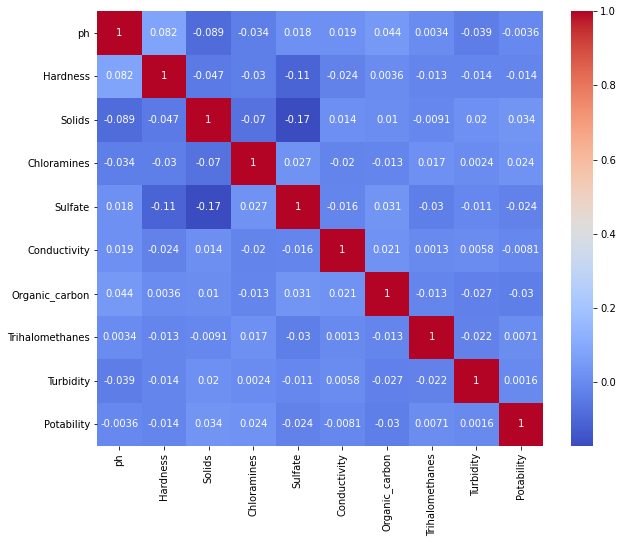

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

In [23]:
# Unstacking the correlation matrix to see the values more clearly.
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

Hardness  Sulfate           0.106923
ph        Solids            0.089288
Hardness  ph                0.082096
Solids    Chloramines       0.070148
Hardness  Solids            0.046899
ph        Organic_carbon    0.043503
dtype: float64

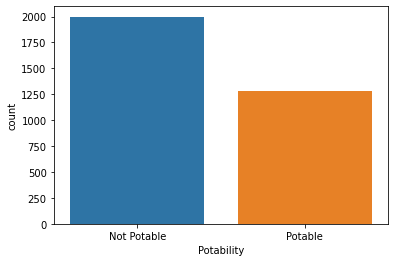

In [24]:
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

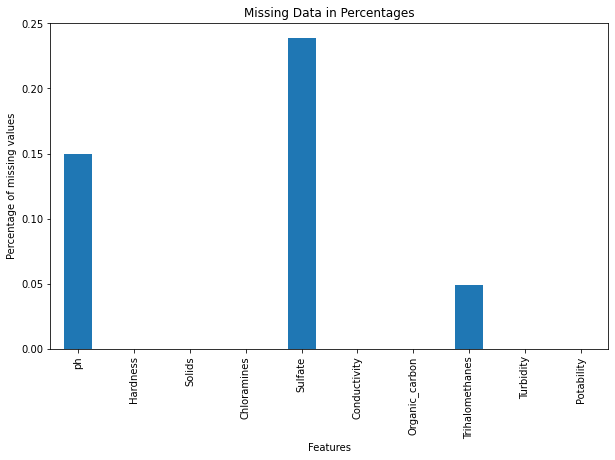

In [25]:
df.isnull().mean().plot.bar(figsize=(10,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

In [26]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [27]:
df.shape

(3276, 10)

In [28]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [29]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [30]:
df['ph'].mean()

7.080794504276761

In [66]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [67]:
X.shape, y.shape

((3276, 9), (3276,))

In [68]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [69]:
X = scaler.fit_transform(X)
X

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Logistic Regression


accuracy_score :  0.6284658040665434
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



<AxesSubplot:>

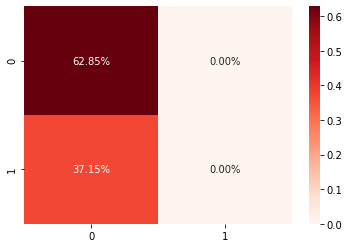

In [72]:
from sklearn.linear_model import LogisticRegression

# Creating model object
lg_model = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

# Training Model
lg_model.fit(X_train, y_train)

# Making Prediction
pred_lg = lg_model.predict(X_test)

# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print('accuracy_score : ', lg)

print(classification_report(y_test,pred_lg))

# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

### Decision Tree Classifier

accuracy_score :  0.6451016635859519
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       680
           1       0.56      0.22      0.32       402

    accuracy                           0.65      1082
   macro avg       0.61      0.56      0.54      1082
weighted avg       0.62      0.65      0.60      1082



<AxesSubplot:>

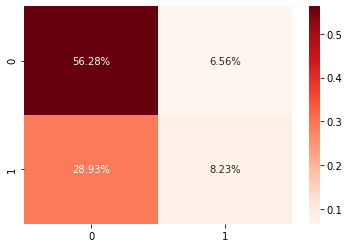

In [73]:
from sklearn.tree import DecisionTreeClassifier

# Creating model object
dt_model = DecisionTreeClassifier( max_depth=4, random_state=42)

# Training Model
dt_model.fit(X_train,y_train)

# Making Prediction
pred_dt = dt_model.predict(X_test)

# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print('accuracy_score : ', dt)

print(classification_report(y_test,pred_dt))

# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

### Random Forest

accuracy_score :  0.6284658040665434
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



<AxesSubplot:>

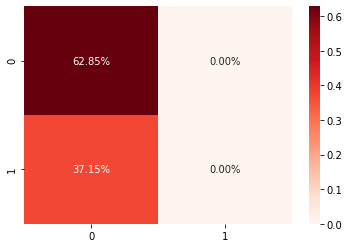

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Creating model object
rf_model = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

# Training Model
rf_model.fit(X_train, y_train)

# Making Prediction
pred_rf = rf_model.predict(X_test)

# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print('accuracy_score : ', rf)

print(classification_report(y_test,pred_rf))

# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

### XGBoost Classifier

accuracy_score :  0.6709796672828097
              precision    recall  f1-score   support

           0       0.68      0.89      0.77       680
           1       0.61      0.31      0.41       402

    accuracy                           0.67      1082
   macro avg       0.65      0.60      0.59      1082
weighted avg       0.66      0.67      0.64      1082



<AxesSubplot:>

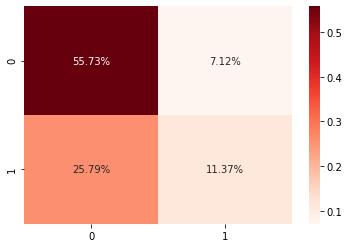

In [75]:
from xgboost import XGBClassifier

# Creating model object
xgb_model = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

# Training Model
xgb_model.fit(X_train, y_train)

# Making Prediction
pred_xgb = model_xgb.predict(X_test)

# Calculating Accuracy Score
xgb = accuracy_score(y_test, pred_xgb)
print('accuracy_score : ', xgb)

print(classification_report(y_test,pred_xgb))

# confusion Maxtrix
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

### KNN

accuracy_score :  0.6534195933456562
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       680
           1       0.55      0.37      0.44       402

    accuracy                           0.65      1082
   macro avg       0.62      0.60      0.59      1082
weighted avg       0.64      0.65      0.63      1082



<AxesSubplot:>

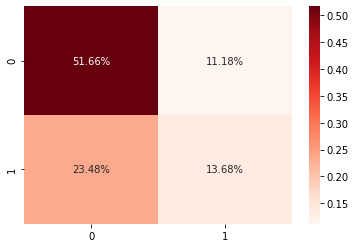

In [76]:
from sklearn.neighbors import KNeighborsClassifier

# Creating model object
knn_model = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

# Training Model
knn_model.fit(X_train, y_train)

# Making Prediction
pred_knn = model_kn.predict(X_test)

# Calculating Accuracy Score
knn = accuracy_score(y_test, pred_knn)
print('accuracy_score : ', knn)

print(classification_report(y_test,pred_knn))

# confusion Maxtrix
cm5 = confusion_matrix(y_test, pred_knn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

### SVM

accuracy_score :  0.6885397412199631
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       680
           1       0.68      0.30      0.42       402

    accuracy                           0.69      1082
   macro avg       0.69      0.61      0.60      1082
weighted avg       0.69      0.69      0.65      1082



<AxesSubplot:>

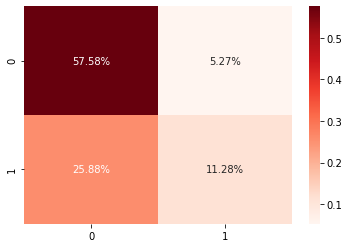

In [77]:
from sklearn.svm import SVC, LinearSVC

svm_model = SVC(kernel='rbf', random_state = 42)

svm_model.fit(X_train, y_train)

# Making Prediction
pred_svm = svm_model.predict(X_test)

# Calculating Accuracy Score
svm = accuracy_score(y_test, pred_svm)
print('accuracy_score : ', svm)

print(classification_report(y_test,pred_svm))

# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')

### AdaBoost Classifier

accuracy_score :  0.634011090573013


<AxesSubplot:>

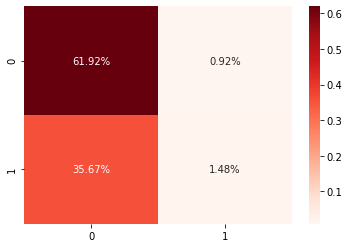

In [78]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)

ada_model.fit(X_train, y_train)

# Making Prediction
pred_ada = ada_model.predict(X_test)

# Calculating Accuracy Score
ada = accuracy_score(y_test, pred_ada)
print('accuracy_score : ', ada)

# confusion Maxtrix
cm7 = confusion_matrix(y_test, pred_ada)
sns.heatmap(cm7/np.sum(cm7), annot = True, fmt=  '0.2%', cmap = 'Reds')

,Model,Accuracy_score
5,SVM,0.688540
3,XGBoost,0.670980
4,KNeighbours,0.653420
1,Decision Tree,0.645102
6,AdaBoost,0.634011
0,Logistic Regression,0.628466
2,Random Forest,0.628466


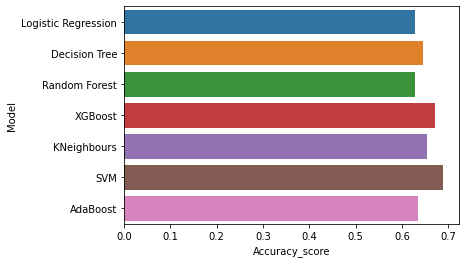

In [79]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy_score' :[lg, dt, rf, xgb, knn, svm, ada]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

#### Conclusion :- SVM classifier has achieved highest accuracy.